In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import ensemble
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

In [2]:
zori = pd.read_csv('./cleandata/clean_zori.csv').drop('Unnamed: 0', axis = 1)
hpi = pd.read_csv('./cleandata/clean_hpi.csv').drop('Unnamed: 0', axis = 1)
zhvi = pd.read_csv('./cleandata/clean_zhvi.csv').drop('Unnamed: 0', axis = 1)
airq = pd.read_csv('./cleandata/clean_airq.csv').drop('Unnamed: 0', axis = 1)
population = pd.read_csv('./cleandata/clean_population.csv').drop('Unnamed: 0', axis = 1)
unemployment = pd.read_csv('./cleandata/clean_unemployment.csv').drop('Unnamed: 0', axis = 1)
education = pd.read_csv('./cleandata/clean_education.csv').drop('Unnamed: 0', axis = 1)
permits = pd.read_csv('./cleandata/clean_permits.csv').drop('Unnamed: 0', axis = 1)
IandH = pd.read_csv('./cleandata/clean_IandH.csv').drop('Unnamed: 0', axis = 1)
pce = pd.read_csv('./cleandata/clean_pce.csv').drop('Unnamed: 0', axis = 1)
vacancy = pd.read_csv('./cleandata/clean_vacancy.csv').drop('Unnamed: 0', axis = 1)
jobs = pd.read_csv('./cleandata/clean_jos.csv').drop('Unnamed: 0', axis = 1)
commute_worker = pd.read_csv('./cleandata/clean_commute_worker.csv').drop('Unnamed: 0', axis = 1)
grapi = pd.read_csv('./cleandata/clean_grapi.csv').drop('Unnamed: 0', axis = 1)
income_inequality = pd.read_csv('./cleandata/clean_income_inequality.csv').drop('Unnamed: 0', axis = 1)
population_density = pd.read_csv('./cleandata/clean_population_density.csv').drop('Unnamed: 0', axis = 1)

# Combine data for same month and year

In [291]:
df = zori.copy()
#df = zori[zori['ZORI'] <= 4000]

In [292]:
df = pd.merge(df, zhvi[['Year_Month', 'ZipCode', 'ZHVI']], left_on = ['Year_Month', 'ZipCode'],
              right_on = ['Year_Month', 'ZipCode'], how = 'left')

In [293]:
df = pd.merge(df, hpi[['Year_Month', 'ZipCode', 'HPI']], left_on = ['Year_Month', 'ZipCode'],
              right_on = ['Year_Month', 'ZipCode'], how = 'left')

In [294]:
df = pd.merge(df, airq[['County', 'State', 'Year_Month', 'AQI']], left_on = ['County', 'State', 'Year_Month'],
              right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [295]:
df = pd.merge(df, population[['County', 'State', 'Year_Month', 'Population']], 
              left_on = ['County', 'State', 'Year_Month'], right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [296]:
df = pd.merge(df, unemployment[['County', 'State', 'Year_Month', 'Unemployment']], 
             left_on = ['County', 'State', 'Year_Month'], right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [297]:
df = pd.merge(df, education[['County', 'State', 'Year_Month', 'Percent Bachelors']],
              left_on = ['County', 'State', 'Year_Month'], right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [298]:
df = pd.merge(df, permits[['State', 'Units', 'Year_Month']], left_on = ['State', 'Year_Month'], 
              right_on = ['State', 'Year_Month'], how = 'left')

In [299]:
df = pd.merge(df, IandH[['County', 'State', 'Year_Month', 'Total_Households', 'Med_income']], 
             left_on = ['County', 'State', 'Year_Month'], right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [300]:
df = pd.merge(df, pce[['PCE', 'Year_Month']], left_on = 'Year_Month', right_on = 'Year_Month')

In [301]:
df = pd.merge(df, vacancy[['County', 'State', 'Year_Month', 'Rental Vacancy Rate']], left_on = ['County', 'State', 'Year_Month'], right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [302]:
df = pd.merge(df, jobs[['State', 'Job Openings', 'Year_Month']], left_on = ['State', 'Year_Month'], 
              right_on = ['State', 'Year_Month'], how = 'left')

In [303]:
df = pd.merge(df, commute_worker[['County', 'State', 'CommuteTime', 'Salwrkr', 'Govwrkr', 'Year_Month']],
              left_on = ['County', 'State', 'Year_Month'], right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [304]:
df = pd.merge(df, grapi[['County', 'State', 'GRAPI', 'Year_Month']], left_on = ['County', 'State', 'Year_Month'], 
              right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [305]:
df = pd.merge(df, income_inequality[['County', 'State', 'Gini_Index', 'Year_Month']], left_on = ['County', 'State', 'Year_Month'], 
              right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [306]:
df = pd.merge(df, population_density[['County', 'State', 'P_Density', 'Year_Month']], left_on = ['County', 'State', 'Year_Month'], 
              right_on = ['County', 'State', 'Year_Month'], how = 'left')

In [307]:
df.drop('Year_Month', axis = 1, inplace = True)

In [308]:
pd.options.display.max_columns = None
df.head()


,ZipCode,County,State,ZORI,Year,Month,ZHVI,HPI,AQI,Population,Unemployment,Percent Bachelors,Units,Total_Households,Med_income,PCE,Rental Vacancy Rate,Job Openings,CommuteTime,Salwrkr,Govwrkr,GRAPI,Gini_Index,P_Density
0,10025,New York,NY,3020.0,2014,2,1056185.0,NaN,62.107143,1636268.0,7.1,31.2,1458.0,762228.0,76089.0,1.455676,4.5,212.0,31.3,84.1,8.3,734.7,0.5939,48582.779097
1,60657,Cook,IL,1583.0,2014,2,441010.0,158.76,59.571429,5246456.0,9.1,21.8,269.0,1938055.0,55069.0,1.455676,6.7,154.0,32.8,84.1,11.3,1440.3,0.4982,3209.057490
2,10023,New York,NY,3145.0,2014,2,1015651.0,NaN,62.107143,1636268.0,7.1,31.2,1458.0,762228.0,76089.0,1.455676,4.5,212.0,31.3,84.1,8.3,734.7,0.5939,48582.779097
3,77494,Fort Bend,TX,1746.0,2014,2,311407.0,154.29,NaN,685345.0,4.9,28.3,4368.0,214215.0,87973.0,1.455676,6.5,374.0,32.3,81.8,12.4,48.8,0.4318,773.431064
4,60614,Cook,IL,1752.0,2014,2,564138.0,146.37,59.571429,5246456.0,9.1,21.8,269.0,1938055.0,55069.0,1.455676,6.7,154.0,32.8,84.1,11.3,1440.3,0.4982,3209.057490


In [309]:

df.columns = ['ZipCode','County','State','ZORI','Year','Month','ZHVI', 'HPI', 'AQI',
              'Population', 'Unemployment', 'Percent Bachelors', 'Permits',
              'Total_Households', 'Med_Income', 'PCE', 'Rental Vacancy Rate',
              'Job Openings', 'CommuteTime', 'Salwrkr', 'Govwrkr', 'GRAPI', 'Gini_Index','P_Density']

In [310]:
df.to_csv('stationary_raw_data.csv', index=False)

In [280]:
#df = pd.read_csv('stationary_raw_data.csv')

In [281]:
df = df[df['ZORI'] <= 4000]

In [282]:
df.isnull().sum(axis=0)

ZipCode                    0
County                   160
State                     80
ZORI                       0
Year                       0
Month                      0
ZHVI                   10148
HPI                    43757
AQI                    21659
Population             36095
Unemployment            7458
Percent Bachelors      36095
Permits                   80
Total_Households       36095
Med_Income             36095
PCE                        0
Rental Vacancy Rate    36399
Job Openings           10867
CommuteTime            36095
Salwrkr                36095
Govwrkr                36095
GRAPI                  36095
Gini_Index             36095
P_Density              36095
dtype: int64

In [283]:
df_clean = df[df['Year']!=2020]

In [284]:
# Dropping all NaN values instead of imputing for simplicity for now
df_clean = df_clean[~df_clean['HPI'].isnull()]
df_clean = df_clean[~df_clean['AQI'].isnull()]
df_clean = df_clean[~df_clean['ZHVI'].isnull()]
df_clean = df_clean[~df_clean['Rental Vacancy Rate'].isnull()]

In [285]:
df_clean.isnull().sum(axis=0)

ZipCode                0
County                 0
State                  0
ZORI                   0
Year                   0
Month                  0
ZHVI                   0
HPI                    0
AQI                    0
Population             0
Unemployment           0
Percent Bachelors      0
Permits                0
Total_Households       0
Med_Income             0
PCE                    0
Rental Vacancy Rate    0
Job Openings           0
CommuteTime            0
Salwrkr                0
Govwrkr                0
GRAPI                  0
Gini_Index             0
P_Density              0
dtype: int64

In [286]:
df_clean.shape

(179280, 24)

In [287]:
df_clean.to_csv('stationary_data4.csv', index=False)

In [95]:
df_clean.columns

Index(['ZipCode', 'County', 'State', 'ZORI', 'Year', 'Month', 'ZHVI', 'HPI',
       'AQI', 'Population', 'Unemployment', 'Percent Bachelors', 'Permits',
       'Total_Households', 'Med_Income', 'PCE', 'Rental Vacancy Rate',
       'Job Openings', 'CommuteTime', 'Salwrkr', 'Govwrkr', 'GRAPI',
       'Gini_Index', 'P_Density'],
      dtype='object')

# Create feature for Slope of ZORI versus Year

In [33]:
#perform linear fit of ZORI versus year for chosen Zip Code and return slope
def zipcodeyrslope(code):
    r1 = LinearRegression()
    y1 = df_clean[df_clean['ZipCode']==code]['ZORI']
    x1 = df_clean[df_clean['ZipCode']==code][['Year']]
    r1.fit(x1, y1)
    return r1.coef_[0] 

In [34]:
allzc = df_clean.ZipCode.unique()

In [35]:
# determine slope versus time for all zip codes
ZORI_slopes = []
for code in allzc:
    ZORI_slopes.append(zipcodeyrslope(code))

In [36]:
slope_df = pd.DataFrame({'ZipCode':allzc, 'Slope_by_year':ZORI_slopes })

In [37]:
slope_df.sort_values(by='Slope_by_year',ascending=False)

,ZipCode,Slope_by_year
1891,91011,364.833333
2206,34228,228.887755
2460,92624,208.508621
2554,91436,206.243024
2556,92210,195.574180
...,...,...
2028,50266,-22.184936
1614,20721,-23.063865
1830,22303,-29.874609
1041,77056,-65.350081


In [38]:
#include slope versus year into df_clean data frame
df_clean = pd.merge(df_clean, slope_df[['ZipCode', 'Slope_by_year']], left_on = ['ZipCode'],
              right_on = ['ZipCode'], how = 'left')

In [39]:
#rearrange column order
cols = df_clean.columns.tolist()
cols2 = cols[:3] + cols[4:6] + ['ZORI'] + cols[6:]
#list(zip(cols, cols2))
df_clean = df_clean[cols2]

# Linear Regression Models

In [40]:
# seperate test and train by year
test = df_clean[df_clean['Year']==2019]
train = df_clean[df_clean['Year']<2019]

In [41]:
# linear regression on separation by year
regression1 = LinearRegression()
regression1.fit(train.iloc[:, 5:24], train.iloc[:, 24])
regression1.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.4859566173910883

In [42]:
# seperate by random choice
df_clean.reset_index(inplace = True)
df_clean.drop('index', axis=1, inplace=True)
train_idx = np.random.choice(range(df_clean.shape[0]), round(0.7 * df_clean.shape[0]), replace = False)
test_idx = df_clean.index[~df_clean.index.isin(train_idx)]
train = df_clean.iloc[train_idx, :]
test = df_clean.iloc[test_idx, :]

In [43]:
# linear regression on separation by random choice
regression2 = LinearRegression()
regression2.fit(train.iloc[:, 5:24], train.iloc[:, 24])
regression2.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.47771560958665726

In [44]:
# seperate by random choice of Zip Codes
allzc = pd.Series(df_clean.ZipCode.unique())
train_idx = np.random.choice(range(len(allzc)), round(0.7*len(allzc)), replace = False)
test_idx = allzc.index[~allzc.index.isin(train_idx)]
train_zips = allzc[train_idx]
test_zips = allzc[test_idx]
train = df_clean[df_clean['ZipCode'].isin(train_zips)]
test = df_clean[df_clean['ZipCode'].isin(test_zips)]

In [45]:
# linear regression on separation by random choice of ZipCode
regression2 = LinearRegression()
regression2.fit(train.iloc[:, 5:24], train.iloc[:, 24])
regression2.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.490085675491581

In [38]:
value_f, p_f = f_regression(df_clean.iloc[:, 5:24], df_clean.iloc[:, 24])
mutual_scores = mutual_info_regression(df_clean.iloc[:, 5:24], df_clean.iloc[:, 24])

In [41]:
pd.DataFrame({'mutual information scores':mutual_scores,
              'p_values':p_f,
              'value_f':value_f,
              'coefficients1':regression1.coef_,
             'coefficients2':regression2.coef_},index = df_clean.iloc[:, 5:24].columns)

,mutual information scores,p_values,value_f,coefficients1,coefficients2
ZORI,0.588684,0.000000e+00,57454.903017,0.009309,0.011108
ZHVI,1.043579,0.000000e+00,68006.297966,0.000022,0.000021
HPI,7.320274,0.000000e+00,44207.054348,0.098586,0.108226
AQI,0.199494,0.000000e+00,18287.379864,0.080531,0.074104
Population,4.770250,0.000000e+00,34967.396901,-0.000003,-0.000002
Unemployment,0.269184,1.248628e-126,573.919689,3.428991,3.658547
Percent Bachelors,3.349893,2.029943e-55,246.073179,0.462667,0.473340
Permits,0.369489,0.000000e+00,24171.985978,0.000538,0.000267
Total_Households,4.770658,0.000000e+00,31682.423308,0.000009,0.000005
Med_Income,4.760606,0.000000e+00,3317.821620,-0.000273,-0.000240


# Random Forest Model

In [46]:
# seperate by random choice of Zip Codes
allzc = pd.Series(df_clean.ZipCode.unique())
train_idx = np.random.choice(range(len(allzc)), round(0.7*len(allzc)), replace = False)
test_idx = allzc.index[~allzc.index.isin(train_idx)]
train_zips = allzc[train_idx]
test_zips = allzc[test_idx]
train = df_clean[df_clean['ZipCode'].isin(train_zips)]
test = df_clean[df_clean['ZipCode'].isin(test_zips)]

In [47]:
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=2)

RandomForestRegressor(max_features=2, random_state=42)

In [48]:
randomForest.fit(train.iloc[:, 5:24], train.iloc[:, 24])

RandomForestRegressor(max_features=2, random_state=42)

In [49]:
randomForest.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.7501373824673857

In [50]:
# set to best parameters and try fit.  Only n_estimators and max_depth changed
randomForest.set_params(n_estimators=300, max_depth=16)

RandomForestRegressor(max_depth=16, max_features=2, n_estimators=300,
                      random_state=42)

In [51]:
randomForest.fit(train.iloc[:, 5:24], train.iloc[:, 24])

RandomForestRegressor(max_depth=16, max_features=2, n_estimators=300,
                      random_state=42)

In [52]:
randomForest.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.7667999805153888

In [53]:
# try predictions from one year to the next

In [54]:
test_2014 = test[test['Year']==2014]
test_2015 = test[test['Year']==2015]
pred_yr1 = pd.DataFrame(list(zip(np.array(test_2014.iloc[:,0]),
                               np.array(test_2014.iloc[:,5]),
                                 np.array(test_2015.iloc[:,5]),
                               randomForest.predict(test_2014.iloc[:, 5:24]))),
                      columns=['ZipCode','ZORI_2014','ZORI_2015','Prediction'])
pred_yr1['Pred_2015']= pred_yr1['ZORI_2014']+ pred_yr1['Prediction']
np.sqrt(mean_squared_error(pred_yr1.ZORI_2015, pred_yr1.Pred_2015))/np.mean(pred_yr1.ZORI_2015)

0.4634693575317522

In [55]:
test_1415 = test[test['Year']<2016]
test_2016 = test[test['Year']==2016]
pred_yr2 = pd.DataFrame(list(zip(np.array(test_1415.iloc[:,0]),
                               np.array(test_2015.iloc[:,5]),
                                 np.array(test_2016.iloc[:,5]),
                               randomForest.predict(test_1415.iloc[:, 5:24]))),
                      columns=['ZipCode','ZORI_2015','ZORI_2016','Prediction'])
pred_yr2['Pred_2016']= pred_yr2['ZORI_2015']+ pred_yr2['Prediction']
np.sqrt(mean_squared_error(pred_yr2.ZORI_2016, pred_yr2.Pred_2016))/np.mean(pred_yr2.ZORI_2016)

0.4622605636312282

In [56]:
test_1416 = test[test['Year']<2017]
test_2017 = test[test['Year']==2017]
pred_yr3 = pd.DataFrame(list(zip(np.array(test_1416.iloc[:,0]),
                               np.array(test_2016.iloc[:,5]),
                                 np.array(test_2017.iloc[:,5]),
                               randomForest.predict(test_1416.iloc[:, 5:24]))),
                      columns=['ZipCode','ZORI_2016','ZORI_2017','Prediction'])
pred_yr3['Pred_2017']= pred_yr3['ZORI_2016']+ pred_yr3['Prediction']
np.sqrt(mean_squared_error(pred_yr3.ZORI_2017, pred_yr3.Pred_2017))/np.mean(pred_yr3.ZORI_2017)

0.4534627694922368

In [57]:
test_1417 = test[test['Year']<2018]
test_2018 = test[test['Year']==2018]
pred_yr4 = pd.DataFrame(list(zip(np.array(test_1417.iloc[:,0]),
                               np.array(test_2017.iloc[:,5]),
                                 np.array(test_2018.iloc[:,5]),
                               randomForest.predict(test_1417.iloc[:, 5:24]))),
                      columns=['ZipCode','ZORI_2017','ZORI_2018','Prediction'])
pred_yr4['Pred_2018']= pred_yr4['ZORI_2017']+ pred_yr4['Prediction']
np.sqrt(mean_squared_error(pred_yr4.ZORI_2018, pred_yr4.Pred_2018))/np.mean(pred_yr4.ZORI_2018)

0.43802563900186814

In [58]:
test_1418 = test[test['Year']<2019]
test_2019 = test[test['Year']==2019]
pred_yr5 = pd.DataFrame(list(zip(np.array(test_1418.iloc[:,0]),
                               np.array(test_2018.iloc[:,5]),
                                 np.array(test_2019.iloc[:,5]),
                               randomForest.predict(test_1418.iloc[:, 5:24]))),
                      columns=['ZipCode','ZORI_2018','ZORI_2019','Prediction'])
pred_yr5['Pred_2019']= pred_yr5['ZORI_2018']+ pred_yr5['Prediction']
np.sqrt(mean_squared_error(pred_yr5.ZORI_2019, pred_yr5.Pred_2019))/np.mean(pred_yr5.ZORI_2019)

0.42434652854820093

In [61]:
pred_yr5['Delta']=200*(pred_yr5['Pred_2019']-pred_yr5['ZORI_2019'])/(pred_yr5['Pred_2019']+pred_yr5['ZORI_2019'])

/Applications/anaconda3/envs/Base_new/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Percent Error (%)'), Text(0, 0.5, 'No. of ZipCodes (norm)')]

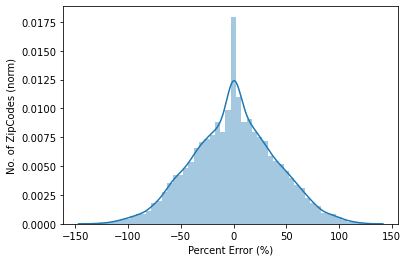

In [66]:
# Display distribution of errors in prediction
g = sns.distplot(pred_yr5['Delta'])
g.set(xlabel='Percent Error (%)', ylabel='No. of ZipCodes (norm)')

In [67]:
fi_values = pd.Series(randomForest.feature_importances_, index = test.iloc[:, 5:24].columns).sort_values(ascending=False)
pd.DataFrame({'feature importance':fi_values})

,feature importance
Job Openings,0.107166
ZORI,0.097154
ZHVI,0.096856
Total_Households,0.074465
HPI,0.074020
Population,0.073233
Rental Vacancy Rate,0.072509
Permits,0.051493
GRAPI,0.048547
P_Density,0.044517


# Fitting of earlier features to (ZORI_2019 - ZORI_2018)

In [29]:
#df_clean = pd.read_csv('stationary_data2.csv') # start with fresh data

In [179]:
df_features = df_clean[df_clean['Year']<2019]

In [180]:
df_2019 = df_clean[df_clean['Year']==2019][['Year','Month','ZipCode','ZORI']]
df_2019 = df_2019.rename(columns={'ZORI':'ZORI_2019'})
df_2018 = df_clean[df_clean['Year']==2018][['Year','Month','ZipCode','ZORI']]
df_2018 = df_2018.rename(columns={'ZORI':'ZORI_2018'})
df_2019['Year'] = df_2019['Year']-1

In [181]:
# combine 2018 and 2019 ZORI into one dataframe
df_predict = pd.merge(df_2018, df_2019, left_on = ['Year','Month','ZipCode'],
              right_on = ['Year','Month','ZipCode'], how = 'left')

In [182]:
df_predict = df_predict[~df_predict['ZORI_2019'].isnull()]

In [183]:
df_predict.isnull().sum(axis=0)

Year         0
Month        0
ZipCode      0
ZORI_2018    0
ZORI_2019    0
dtype: int64

In [184]:
# calculate change in ZORI from 2019 to 2018
df_predict['DZORI']=2*(df_predict['ZORI_2019']-df_predict['ZORI_2018'])/(df_predict['ZORI_2019']+df_predict['ZORI_2018'])

In [185]:
#checking combined data
df_predict[df_predict['ZipCode']==92602].head(100)

,Year,Month,ZipCode,ZORI_2018,ZORI_2019,DZORI
1881,2018,1,92602,3283.0,3367.0,0.025263
4545,2018,2,92602,3289.0,3379.0,0.026995
7219,2018,3,92602,3294.0,3391.0,0.029020
9884,2018,4,92602,3299.0,3404.0,0.031329
12556,2018,5,92602,3308.0,3419.0,0.033001
15240,2018,6,92602,3316.0,3433.0,0.034672
17928,2018,7,92602,3325.0,3448.0,0.036321
20608,2018,8,92602,3331.0,3461.0,0.038280
23290,2018,9,92602,3338.0,3474.0,0.039930
25965,2018,10,92602,3344.0,3487.0,0.041868


In [186]:
#combine with features from 2014-2018
df_features = pd.merge(df_features, df_predict[['Month','ZipCode','DZORI']], left_on = ['Month','ZipCode'],
              right_on = ['Month','ZipCode'], how = 'left')

In [187]:
#checking combined data
df_features[df_features['ZipCode']==92602].head(12)

,ZipCode,County,State,ZORI,Year,Month,ZHVI,HPI,AQI,Population,Unemployment,Percent Bachelors,Permits,Total_Households,Med_Income,PCE,Rental Vacancy Rate,Job Openings,CommuteTime,Salwrkr,Govwrkr,GRAPI,Gini_Index,P_Density,DZORI
1557,92602,Orange,CA,2968.0,2014,2,914390.0,211.23,59.000000,3145515.0,6.0,24.6,3401.0,1018862.0,76306.0,1.455676,3.4,449.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.026995
3698,92602,Orange,CA,2974.0,2014,3,905900.0,211.23,53.774194,3145515.0,5.9,24.6,3704.0,1018862.0,76306.0,1.553287,3.4,472.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.029020
6032,92602,Orange,CA,2980.0,2014,4,901592.0,211.23,60.766667,3145515.0,5.1,24.6,5327.0,1018862.0,76306.0,1.649862,3.4,512.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.031329
8459,92602,Orange,CA,2987.0,2014,5,894836.0,211.23,70.838710,3145515.0,5.2,24.6,2574.0,1018862.0,76306.0,1.710313,3.4,505.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.033001
10992,92602,Orange,CA,2993.0,2014,6,892724.0,211.23,63.900000,3145515.0,5.6,24.6,2594.0,1018862.0,76306.0,1.652257,3.4,526.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.034672
13598,92602,Orange,CA,2999.0,2014,7,890792.0,211.23,57.967742,3145515.0,6.0,24.6,3730.0,1018862.0,76306.0,1.706296,3.4,515.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.036321
16206,92602,Orange,CA,3005.0,2014,8,885392.0,211.23,57.290323,3145515.0,5.8,24.6,2742.0,1018862.0,76306.0,1.626704,3.4,557.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.038280
18811,92602,Orange,CA,3011.0,2014,9,882959.0,211.23,67.333333,3145515.0,5.3,24.6,3381.0,1018862.0,76306.0,1.631711,3.4,555.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.039930
21334,92602,Orange,CA,3017.0,2014,10,880531.0,211.23,70.064516,3145515.0,5.2,24.6,5954.0,1018862.0,76306.0,1.511705,3.4,572.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.041868
23790,92602,Orange,CA,3023.0,2014,11,884612.0,211.23,53.300000,3145515.0,5.1,24.6,4517.0,1018862.0,76306.0,1.445545,3.4,535.0,27.0,82.0,10.3,540.6,0.4693,3318.368832,0.040053


In [188]:
df_features = df_features[~df_features['DZORI'].isnull()]
df_features.isnull().sum(axis=0)


ZipCode                0
County                 0
State                  0
ZORI                   0
Year                   0
Month                  0
ZHVI                   0
HPI                    0
AQI                    0
Population             0
Unemployment           0
Percent Bachelors      0
Permits                0
Total_Households       0
Med_Income             0
PCE                    0
Rental Vacancy Rate    0
Job Openings           0
CommuteTime            0
Salwrkr                0
Govwrkr                0
GRAPI                  0
Gini_Index             0
P_Density              0
DZORI                  0
dtype: int64

In [189]:
#rearrange column order
cols = df_features.columns.tolist()
cols2 = cols[:3] + cols[4:6] + ['ZORI'] + cols[6:]
#list(zip(cols, cols2))
df_features = df_features[cols2]

In [190]:
# remake test and train sets seperated by random choice of Zip Codes
allzc = pd.Series(df_features.ZipCode.unique())
train_idx = np.random.choice(range(len(allzc)), round(0.7*len(allzc)), replace = False)
test_idx = allzc.index[~allzc.index.isin(train_idx)]
train_zips = allzc[train_idx]
test_zips = allzc[test_idx]
train = df_features[df_features['ZipCode'].isin(train_zips)]
test = df_features[df_features['ZipCode'].isin(test_zips)]

In [191]:
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=300, max_features=2, max_depth=16)

RandomForestRegressor(max_depth=16, max_features=2, n_estimators=300,
                      random_state=42)

In [192]:
train.columns

Index(['ZipCode', 'County', 'State', 'Year', 'Month', 'ZORI', 'ZHVI', 'HPI',
       'AQI', 'Population', 'Unemployment', 'Percent Bachelors', 'Permits',
       'Total_Households', 'Med_Income', 'PCE', 'Rental Vacancy Rate',
       'Job Openings', 'CommuteTime', 'Salwrkr', 'Govwrkr', 'GRAPI',
       'Gini_Index', 'P_Density', 'DZORI'],
      dtype='object')

In [193]:
randomForest.fit(train.iloc[:, 5:24], train.iloc[:, 24])

RandomForestRegressor(max_depth=16, max_features=2, n_estimators=300,
                      random_state=42)

In [194]:
randomForest.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.32585110085711144

In [195]:
regression = LinearRegression()
regression.fit(df_features.iloc[:, 5:24], df_features.iloc[:, 24])
regression.score(df_features.iloc[:, 5:24], df_features.iloc[:, 24])

0.19250543684831034

In [196]:
#remake test and train sets to be random collection
df_features.reset_index(inplace = True)
df_features.drop('index', axis=1, inplace=True)
train_idx = np.random.choice(range(df_features.shape[0]), round(0.7 * df_features.shape[0]), replace = False)
test_idx = df_features.index[~df_features.index.isin(train_idx)]
train = df_features.iloc[train_idx, :]
test = df_features.iloc[test_idx, :]

In [197]:
randomForest.fit(train.iloc[:, 5:24], train.iloc[:, 24])

RandomForestRegressor(max_depth=16, max_features=2, n_estimators=300,
                      random_state=42)

In [198]:
randomForest.score(test.iloc[:, 5:24], test.iloc[:, 24])

0.6320722975811297

# Calculate slope for other parameters

In [125]:
#perform linear fit of feature versus year for chosen Zip Code and return slope
def slopeall(code, feature):
    r1 = LinearRegression()
    y1 = df_features[df_features['ZipCode']==code][feature]
    x1 = df_features[df_features['ZipCode']==code][['Year']]
    r1.fit(x1, y1)
    return r1.coef_[0] 

In [126]:
features = df_features.iloc[:,6:23].columns
allzc = df_features.ZipCode.unique()

In [127]:
def findslopes(feature):
    slopes = []
    print(feature)
    for code in allzc:
        slopes.append(slopeall(code, feature))
    return slopes

In [128]:
all_slopes = []
for feature in features:
    all_slopes.append(findslopes(feature))

ZHVI
HPI
AQI
Population
Unemployment
Percent Bachelors
Permits
Total_Households
Med_Income
PCE
Rental Vacancy Rate
Job Openings
CommuteTime
Salwrkr
Govwrkr
GRAPI
Gini_Index


In [130]:
slope_df = pd.DataFrame({'ZipCode':allzc, 
                         'ZHVI_slope':all_slopes[0],
                        'HPI_slope':all_slopes[1],
                        'AQI_slope':all_slopes[2],
                        'Pop_slope':all_slopes[3],
                        'Unemploy_slope':all_slopes[4],
                        'Bach_slope':all_slopes[5],
                        'Units_slope':all_slopes[6],
                        'House_slope':all_slopes[7],
                        'Income_slope':all_slopes[8],
                        'PCE_slope':all_slopes[9],
                        'Vacancy_slope':all_slopes[10],
                        'Job_slope':all_slopes[11],
                        'CTime_slope':all_slopes[12],
                        'Salwrkr_slope':all_slopes[13],
                        'Govwrkr_slope':all_slopes[14],
                        'GRAPI_slope':all_slopes[15],
                        'Gini_slope':all_slopes[16]})

In [131]:
slope_df.head() # dataframe containing slopes of all parameters versus year

,ZipCode,ZHVI_slope,HPI_slope,AQI_slope,Pop_slope,Unemploy_slope,Bach_slope,Units_slope,House_slope,Income_slope,PCE_slope,Vacancy_slope,Job_slope,CTime_slope,Salwrkr_slope,Govwrkr_slope,GRAPI_slope,Gini_slope
0,60657,11720.517398,5.988596,0.205363,-15910.798246,-0.754825,0.338246,58.351462,8059.945614,2111.298246,0.127975,0.032281,16.930117,0.157895,0.037895,-0.066842,-277.604912,0.002131
1,60614,16446.516667,3.905404,0.205363,-15910.798246,-0.754825,0.338246,58.351462,8059.945614,2111.298246,0.127975,0.032281,16.930117,0.157895,0.037895,-0.066842,-277.604912,0.002131
2,77449,8803.000146,11.357930,-0.757332,62648.070175,-0.066608,0.326842,-173.004678,12443.131579,1408.726316,0.127975,0.829123,16.152485,0.131930,-0.307895,0.103509,-244.720351,-0.000833
3,77084,8230.547222,8.679123,-0.757332,62648.070175,-0.066608,0.326842,-173.004678,12443.131579,1408.726316,0.127975,0.829123,16.152485,0.131930,-0.307895,0.103509,-244.720351,-0.000833
4,79936,1853.590058,2.796649,1.649437,1931.085965,-0.482646,0.090175,-173.004678,3740.963158,818.875439,0.127975,-0.153684,16.152485,0.254737,0.119825,-0.173509,-42.840702,0.008479


In [132]:
slope_df.shape

(2615, 18)

In [199]:
#combine slopes with 2014-2018 features
df_slope_features = pd.merge(df_features, slope_df, left_on = ['ZipCode'],
              right_on = ['ZipCode'], how = 'left')

In [213]:
df_avgonzips = df_slope_features.groupby('ZipCode').mean().reset_index()

In [216]:
#shift position of DZORI to be last column
cols = df_avgonzips.columns.tolist()
cols2 = cols[:22] + cols[23:] 
cols2.append('DZORI')
#list(zip(cols, cols2))
df_avgonzips = df_avgonzips[cols2]

# Fitting slopes from 2014-2018 to price change from 2018-2019

In [217]:
df_avgonzips.columns

Index(['ZipCode', 'Year', 'Month', 'ZORI', 'ZHVI', 'HPI', 'AQI', 'Population',
       'Unemployment', 'Percent Bachelors', 'Permits', 'Total_Households',
       'Med_Income', 'PCE', 'Rental Vacancy Rate', 'Job Openings',
       'CommuteTime', 'Salwrkr', 'Govwrkr', 'GRAPI', 'Gini_Index', 'P_Density',
       'ZHVI_slope', 'HPI_slope', 'AQI_slope', 'Pop_slope', 'Unemploy_slope',
       'Bach_slope', 'Units_slope', 'House_slope', 'Income_slope', 'PCE_slope',
       'Vacancy_slope', 'Job_slope', 'CTime_slope', 'Salwrkr_slope',
       'Govwrkr_slope', 'GRAPI_slope', 'Gini_slope', 'DZORI'],
      dtype='object')

In [218]:
regression = LinearRegression()
regression.fit(df_avgonzips.iloc[:, 3:39], df_avgonzips.iloc[:, 39])
regression.score(df_avgonzips.iloc[:, 3:39], df_avgonzips.iloc[:, 39])

0.34967583938453517

In [219]:
# remake test and train sets
df_avgonzips.reset_index(inplace = True)
df_avgonzips.drop('index', axis=1, inplace=True)
train_idx = np.random.choice(range(df_avgonzips.shape[0]), round(0.7 * df_avgonzips.shape[0]), replace = False)
test_idx = df_avgonzips.index[~df_avgonzips.index.isin(train_idx)]
train = df_avgonzips.iloc[train_idx, :]
test = df_avgonzips.iloc[test_idx, :]

In [239]:
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=300, max_features=2, max_depth=18)

RandomForestRegressor(max_depth=18, max_features=2, n_estimators=300,
                      random_state=42)

In [240]:
randomForest.fit(train.iloc[:, 3:39], train.iloc[:, 39])

RandomForestRegressor(max_depth=18, max_features=2, n_estimators=300,
                      random_state=42)

In [241]:
randomForest.score(test.iloc[:, 3:39], test.iloc[:, 39])

0.419991138500417

In [243]:
mean_squared_error(randomForest.predict(test.iloc[:, 3:39]), test['DZORI'])

0.00020003192202957176

In [244]:
pred_slopes = pd.DataFrame(list(zip(np.array(test.iloc[:,0]),
                               np.array(test.iloc[:,39]),
                               randomForest.predict(test.iloc[:, 3:39]))),
                      columns=['ZipCode','DZORI','Prediction'])
np.sqrt(mean_squared_error(pred_slopes.DZORI, pred_slopes.Prediction))/np.mean(pred_slopes.DZORI)

0.38618035839918774

In [245]:
pred_slopes['Delta']=200*(pred_slopes['Prediction']-pred_slopes['DZORI'])/(pred_slopes['Prediction']+pred_slopes['DZORI'])

/Applications/anaconda3/envs/Base_new/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Percent Error (%)'),
 Text(0, 0.5, 'No. of ZipCodes (norm)'),
 (-150.0, 150.0)]

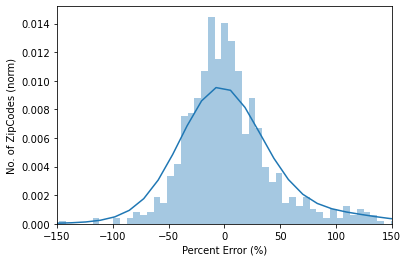

In [259]:
# Display distribution of errors in prediction
g = sns.distplot(pred_slopes['Delta'], bins=400)
g.set(xlabel='Percent Error (%)', ylabel='No. of ZipCodes (norm)', xlim=(-150, 150))

In [242]:
fi_values = pd.Series(randomForest.feature_importances_, index = test.iloc[:, 3:39].columns).sort_values(ascending=False)
pd.DataFrame({'feature importance':fi_values})

,feature importance
ZORI,0.061880
P_Density,0.045689
House_slope,0.040195
ZHVI,0.040036
Pop_slope,0.037100
HPI_slope,0.036977
ZHVI_slope,0.035218
AQI,0.034526
PCE_slope,0.028789
AQI_slope,0.028387


In [251]:
#try fit using only most important features
best_parms = df_avgonzips[['ZORI','P_Density','House_slope','ZHVI','Pop_slope','HPI_slope','ZHVI_slope','AQI',
                          'PCE_slope','AQI_slope','PCE','HPI','DZORI']].copy()

In [252]:
# remake test and train sets
best_parms.reset_index(inplace = True)
best_parms.drop('index', axis=1, inplace=True)
train_idx = np.random.choice(range(best_parms.shape[0]), round(0.7 * best_parms.shape[0]), replace = False)
test_idx = best_parms.index[~best_parms.index.isin(train_idx)]
train = best_parms.iloc[train_idx, :]
test = best_parms.iloc[test_idx, :]

In [256]:
regression = LinearRegression()
regression.fit(best_parms.iloc[:, 0:12], best_parms.iloc[:, 12])
regression.score(best_parms.iloc[:, 0:12], best_parms.iloc[:, 12])

0.28484187145843276

In [253]:
randomForest.fit(train.iloc[:, 0:12], train.iloc[:, 12])

RandomForestRegressor(max_depth=18, max_features=2, n_estimators=300,
                      random_state=42)

In [254]:
randomForest.score(test.iloc[:, 0:12], test.iloc[:, 12])

0.4366116795549986

In [255]:
fi_values = pd.Series(randomForest.feature_importances_, index = test.iloc[:, 0:12].columns).sort_values(ascending=False)
pd.DataFrame({'feature importance':fi_values})

,feature importance
ZORI,0.133254
House_slope,0.098834
Pop_slope,0.096671
P_Density,0.095255
AQI,0.082334
ZHVI_slope,0.079526
HPI_slope,0.077889
ZHVI,0.073687
PCE_slope,0.070059
PCE,0.067188


In [108]:
#try different set of hyperparameters
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(criterion = 'mse', 
                        max_depth = 10,
                        min_samples_leaf = 75,
                        min_samples_split = 75,
                        random_state=42, 
                        n_estimators=300)

RandomForestRegressor(max_depth=10, min_samples_leaf=75, min_samples_split=75,
                      n_estimators=300, random_state=42)

In [109]:
randomForest.fit(train.iloc[:, 3:28], train.iloc[:, 28])

RandomForestRegressor(max_depth=10, min_samples_leaf=75, min_samples_split=75,
                      n_estimators=300, random_state=42)

In [110]:
randomForest.score(test.iloc[:, 3:28], test.iloc[:, 28])

0.5488287719101752

In [111]:
fi_values = pd.Series(randomForest.feature_importances_, index = test.iloc[:, 3:28].columns).sort_values(ascending=False)
pd.DataFrame({'feature importance':fi_values})

,feature importance
ZHVI_slope,0.316007
Job_slope,0.110127
Total_Households,0.080492
Population,0.071123
House_slope,0.055276
Pop_slope,0.050989
Income_slope,0.044195
ZORI,0.032385
Vacancy_slope,0.032307
HPI_slope,0.032105
